# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
#!pip install -U jupyter #needed to pip install update my jupyter notebook and these libraries
#!pip install matplotlib 
#!pip install requests
#!pip install time
#!pip install scipy
#!pip install citipy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #documentation here: https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html?highlight=random%20uniform#numpy.random.uniform
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs) #https://www.programiz.com/python-programming/methods/built-in/zip

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name #docuemntation here: https://libraries.io/pypi/citipy
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#Some lat,lng combinations will not produce a nearby city, so it's better to have more than 500 in this step in order to make up for lack of cities near some lat,lng combos
len(cities)
#print(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#inspect what the api data will look like for one city, in this example, Atlanta
url="http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q=atlanta"
response_json = requests.get(query_url).json()
pprint(response_json)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 33.749, 'lon': -84.388},
 'dt': 1612729959,
 'id': 4180439,
 'main': {'feels_like': 40.98,
          'humidity': 61,
          'pressure': 1017,
          'temp': 49.64,
          'temp_max': 52,
          'temp_min': 46.99},
 'name': 'Atlanta',
 'sys': {'country': 'US',
         'id': 4155,
         'sunrise': 1612700957,
         'sunset': 1612739652,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 330, 'speed': 10.36}}


In [4]:
#build endpoint url for our searches, using the weather_api_key defined in the first cell
url="http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
lat = []
lng = []
city_list = [] #need this empty city list to pull in the cities found near the lat,lng provided
counter = 0 #need this counter to count the number of records processed in the for loop

for city in cities:
    response_json = requests.get(query_url + city).json() #this puts in the endpoint url for each city from our "cities" list created in the cell earlier
    
    #utilize the test print of Atlanta above to see where each of the values we need comes from
    try:
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        city_list.append(city)
        counter+=1
        print(f"Processing Record {counter} | {city}")
    
    except: #utilized this code found in activity 10-Stu_API_ExceptionsSolved
        print("City not found. Skipping...")
        pass #this pass allows the for loop to continue after the try/except code

Processing Record 1 | cape town
City not found. Skipping...
Processing Record 2 | jamestown
Processing Record 3 | komsomolskiy
Processing Record 4 | jeremie
Processing Record 5 | busselton
Processing Record 6 | vila velha
Processing Record 7 | kamenka
Processing Record 8 | rikitea
Processing Record 9 | provideniya
Processing Record 10 | yellowknife
Processing Record 11 | port moresby
Processing Record 12 | sambalpur
Processing Record 13 | hualmay
Processing Record 14 | dikson
Processing Record 15 | batticaloa
City not found. Skipping...
Processing Record 16 | souillac
Processing Record 17 | khatanga
Processing Record 18 | lorengau
Processing Record 19 | ulagan
Processing Record 20 | sinnamary
Processing Record 21 | bengkulu
Processing Record 22 | chuy
City not found. Skipping...
City not found. Skipping...
Processing Record 23 | port alfred
Processing Record 24 | punta arenas
Processing Record 25 | shimanovsk
Processing Record 26 | codrington
Processing Record 27 | aitape
Processing Re

Processing Record 236 | ibra
City not found. Skipping...
Processing Record 237 | port lincoln
Processing Record 238 | umm kaddadah
Processing Record 239 | rosetta
Processing Record 240 | sulangan
Processing Record 241 | mumbwa
Processing Record 242 | srednekolymsk
Processing Record 243 | mao
Processing Record 244 | lingao
Processing Record 245 | santa rosalia
Processing Record 246 | nanortalik
Processing Record 247 | sao gabriel da cachoeira
Processing Record 248 | havoysund
Processing Record 249 | kabale
City not found. Skipping...
Processing Record 250 | vestmannaeyjar
Processing Record 251 | goderich
Processing Record 252 | kemijarvi
Processing Record 253 | governador valadares
Processing Record 254 | maniitsoq
Processing Record 255 | mapiripan
Processing Record 256 | ulladulla
Processing Record 257 | labelle
Processing Record 258 | jhudo
Processing Record 259 | san patricio
Processing Record 260 | dali
Processing Record 261 | imeni poliny osipenko
Processing Record 262 | namibe
Pro

City not found. Skipping...
Processing Record 462 | paita
Processing Record 463 | meulaboh
Processing Record 464 | locri
Processing Record 465 | aparecida do taboado
Processing Record 466 | halifax
Processing Record 467 | usinsk
Processing Record 468 | margate
Processing Record 469 | coromandel
Processing Record 470 | boldumsaz
Processing Record 471 | laguna
Processing Record 472 | larsnes
Processing Record 473 | sterling
Processing Record 474 | acapulco
Processing Record 475 | lashio
Processing Record 476 | mastung
Processing Record 477 | udachnyy
Processing Record 478 | greytown
Processing Record 479 | parabel
Processing Record 480 | saiha
Processing Record 481 | kandrian
Processing Record 482 | anadyr
Processing Record 483 | angoche
Processing Record 484 | tual
Processing Record 485 | jasper
Processing Record 486 | karratha
Processing Record 487 | hami
Processing Record 488 | vaihingen
Processing Record 489 | shingu
Processing Record 490 | touros
Processing Record 491 | columbia
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create a data frame from the lists created through iteration throug the api request in earlier cell
city_data=pd.DataFrame({
    'City': city_list,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})

#import dependencies to convert dataframe to csv
import os
import csv
# Export Dataframe into a .csv
city_data.to_csv("output_data/cities.csv")

city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,68.00,63,0,18.41,ZA,1612729865
1,jamestown,42.0970,-79.2353,16.00,67,90,18.41,US,1612729959
2,komsomolskiy,40.4272,71.7189,41.00,81,99,6.91,UZ,1612729959
3,jeremie,18.6500,-74.1167,81.66,58,1,5.30,HT,1612729959
4,busselton,-33.6500,115.3333,62.01,99,87,1.99,AU,1612729959


In [6]:
#print the stats for the dataframe
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,21.227093,17.660362,49.108063,71.475352,53.345070,8.963803,1.612730e+09
std,32.787134,91.641759,32.858926,20.322343,40.747391,6.474293,1.711376e+02
min,-54.800000,-175.200000,-37.320000,9.000000,0.000000,0.310000,1.612729e+09
25%,-5.804200,-66.502925,27.245000,60.000000,5.000000,4.407500,1.612730e+09
50%,26.412950,26.760450,59.620000,77.000000,67.500000,7.170000,1.612730e+09
75%,47.516675,100.308850,76.435000,87.000000,97.000000,12.512500,1.612730e+09
max,78.218600,179.316700,93.690000,100.000000,100.000000,49.480000,1.612730e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#according to the max value of humidity above (100), there are no cities where the humidity is >100%, so we do not need to drop any of our cities.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

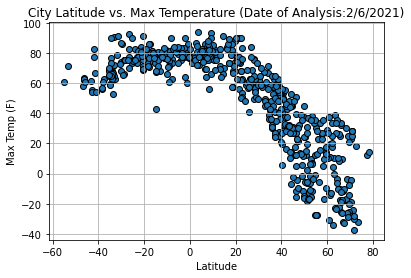

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(city_data["Lat"],city_data["Max Temp"],edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('City Latitude vs. Max Temperature (Date of Analysis:2/6/2021)')
plt.grid()
plt.show()
plt.savefig("images/scatter1.png")

## Latitude vs. Humidity Plot

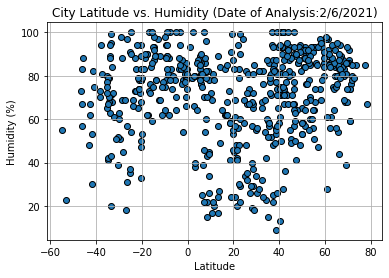

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(city_data["Lat"],city_data["Humidity"],edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Latitude vs. Humidity (Date of Analysis:2/6/2021)')
plt.grid()
plt.show()
plt.savefig("images/scatter2.png")

## Latitude vs. Cloudiness Plot

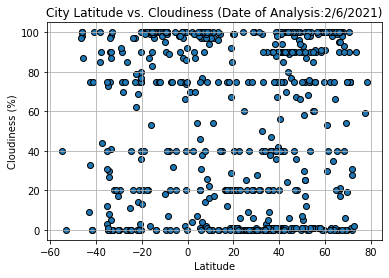

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(city_data["Lat"],city_data["Cloudiness"],edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Latitude vs. Cloudiness (Date of Analysis:2/6/2021)')
plt.grid()
plt.show()
plt.savefig("images/scatter3.png")

## Latitude vs. Wind Speed Plot

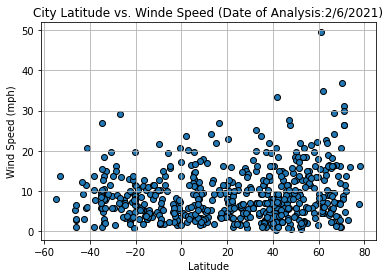

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(city_data["Lat"],city_data["Wind Speed"],edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Latitude vs. Winde Speed (Date of Analysis:2/6/2021)')
plt.grid()
plt.show()
plt.savefig("images/scatter4.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.86.


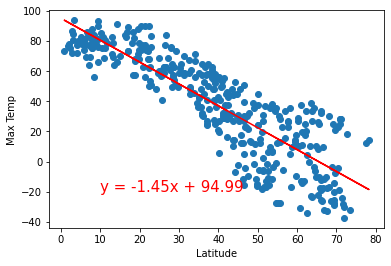

<Figure size 432x288 with 0 Axes>

In [12]:
import scipy.stats as st #import correlation module

northhem_data = city_data.loc[city_data['Lat'] >= 0]#create northern hemisphere data, which contains latitudes greater than or equal to zero

correlation = st.pearsonr(northhem_data["Lat"],northhem_data["Max Temp"])
print(f"The r-value is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northhem_data["Lat"],northhem_data["Max Temp"])
regress_values = northhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem_data["Lat"],northhem_data["Max Temp"])
plt.plot(northhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.savefig("images/regression1.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.46.


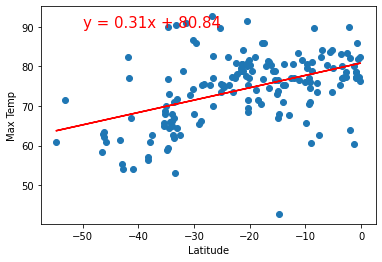

<Figure size 432x288 with 0 Axes>

In [13]:
southhem_data = city_data.loc[city_data['Lat'] < 0]#create southern hemisphere data, which contains latitudes less than zero

correlation = st.pearsonr(southhem_data["Lat"],southhem_data["Max Temp"])
print(f"The r-value is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southhem_data["Lat"],southhem_data["Max Temp"])
regress_values = southhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem_data["Lat"],southhem_data["Max Temp"])
plt.plot(southhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.savefig("images/regression2.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3038885866800875.


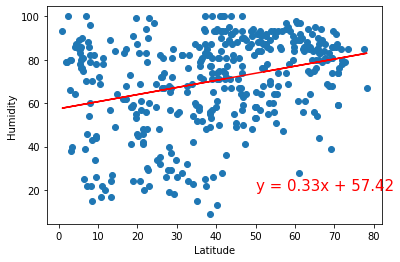

<Figure size 432x288 with 0 Axes>

In [14]:
correlation = st.pearsonr(northhem_data["Lat"],northhem_data["Humidity"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northhem_data["Lat"],northhem_data["Humidity"])
regress_values = northhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem_data["Lat"],northhem_data["Humidity"])
plt.plot(northhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

plt.savefig("images/regression3.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.36528138115067715.


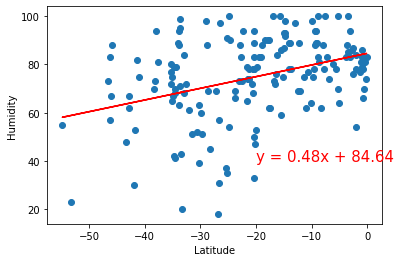

<Figure size 432x288 with 0 Axes>

In [15]:
correlation = st.pearsonr(southhem_data["Lat"],southhem_data["Humidity"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southhem_data["Lat"],southhem_data["Humidity"])
regress_values = southhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem_data["Lat"],southhem_data["Humidity"])
plt.plot(southhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

plt.savefig("images/regression4.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.11818671022883308.


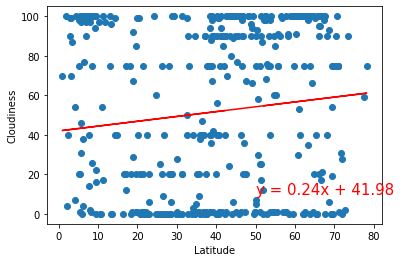

<Figure size 432x288 with 0 Axes>

In [16]:
correlation = st.pearsonr(northhem_data["Lat"],northhem_data["Cloudiness"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northhem_data["Lat"],northhem_data["Cloudiness"])
regress_values = northhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem_data["Lat"],northhem_data["Cloudiness"])
plt.plot(northhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

plt.savefig("images/regression5.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.23247864519093142.


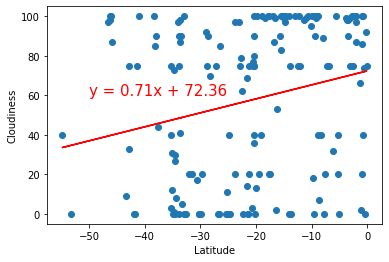

<Figure size 432x288 with 0 Axes>

In [17]:
correlation = st.pearsonr(southhem_data["Lat"],southhem_data["Cloudiness"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southhem_data["Lat"],southhem_data["Cloudiness"])
regress_values = southhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem_data["Lat"],southhem_data["Cloudiness"])
plt.plot(southhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

plt.savefig("images/regression6.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.1891461190347355.


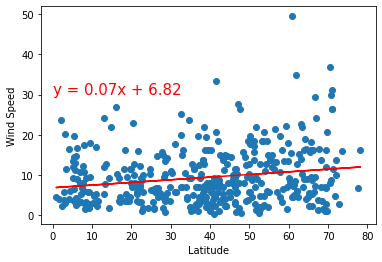

<Figure size 432x288 with 0 Axes>

In [18]:
correlation = st.pearsonr(northhem_data["Lat"],northhem_data["Wind Speed"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northhem_data["Lat"],northhem_data["Wind Speed"])
regress_values = northhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem_data["Lat"],northhem_data["Wind Speed"])
plt.plot(northhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

plt.savefig("images/regression7.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.10915181244748895.


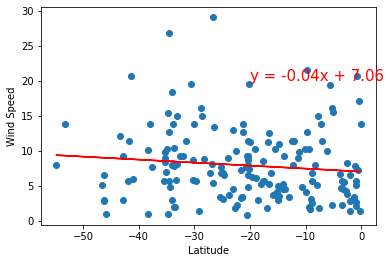

<Figure size 432x288 with 0 Axes>

In [19]:
correlation = st.pearsonr(southhem_data["Lat"],southhem_data["Wind Speed"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southhem_data["Lat"],southhem_data["Wind Speed"])
regress_values = southhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem_data["Lat"],southhem_data["Wind Speed"])
plt.plot(southhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

plt.savefig("images/regression8.png")